In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_columns', 22)
pd.set_option('display.max_rows', 10)

In [6]:
df = pd.read_csv('Superstore.csv', index_col='Row ID')
df.head(1)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2017-152156,11/8/17,11/11/17,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136


In [2]:
!pwd

/c/Users/HP Notebook/Desktop


In [7]:
df.shape
print('The number of rows is {} and number columns in the dataframe is {}'.format(df.shape[0],df.shape[1]))

The number of rows is 9994 and number columns in the dataframe is 20


In [8]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 1 to 9994
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   City           9994 non-null   object 
 8   State          9994 non-null   object 
 9   Postal Code    9983 non-null   float64
 10  Region         9994 non-null   object 
 11  Product ID     9994 non-null   object 
 12  Category       9994 non-null   object 
 13  Sub-Category   9994 non-null   object 
 14  Product Name   9994 non-null   object 
 15  Sales          9994 non-null   float64
 16  Quantity       9994 non-null   int64  
 17  Discount       9994 non-null   float64
 18  Profit       

In [12]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55245.233297,229.858001,3.789574,0.156203,28.656896
std,32038.715955,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,57103.000000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [13]:
duplicates = df.duplicated(keep = False)
duplicates.sum()

2

In [14]:
duplicated_sales = df[duplicates].sort_values('Row ID')
duplicated_sales

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,
3406,US-2015-150119,4/23/15,4/27/15,Standard Class,LB-16795,Laurel Beltran,Home Office,Columbus,Ohio,43229.0,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588
3407,US-2015-150119,4/23/15,4/27/15,Standard Class,LB-16795,Laurel Beltran,Home Office,Columbus,Ohio,43229.0,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [15]:
df.drop_duplicates(keep = 'first',ignore_index = True,inplace=True)
df.duplicated(keep = False).unique() #code to confirm that the found duplicates have been dropped
df.duplicated().sum() 

0

In [16]:
df.shape

(9993, 19)

In [18]:
df['Order ID'].describe() #summary statistics of the Order ID Column

count               9993
unique              5009
top       CA-2018-100111
freq                  14
Name: Order ID, dtype: object

In [20]:
df['Order ID'].dtype  

dtype('O')

In [21]:
df['Order Date'].dtype 

dtype('O')

In [24]:
df['Order Date'] = pd.to_datetime(df['Order Date'])   # Converting into the date to the correct datatype
df['Order Date'].dtype

dtype('<M8[ns]')

In [25]:
print(df['Order Date'])

0      2017-11-08
1      2017-11-08
2      2017-06-12
3      2016-10-11
4      2016-10-11
          ...    
9988   2015-01-21
9989   2018-02-26
9990   2018-02-26
9991   2018-02-26
9992   2018-05-04
Name: Order Date, Length: 9993, dtype: datetime64[ns]


In [26]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])    #checking the datatype of the ShipDate Column
df['Ship Date'].dtype

dtype('<M8[ns]')

In [28]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [30]:
df['Ship Mode'] = df['Ship Mode'].astype('category')    # Changing to datatype to category
df['Ship Mode'].dtype

CategoricalDtype(categories=['First Class', 'Same Day', 'Second Class', 'Standard Class'], ordered=False)

In [31]:
df['Ship Mode'].describe() 

count               9993
unique                 4
top       Standard Class
freq                5967
Name: Ship Mode, dtype: object

In [33]:

df['Customer ID'].nunique()

793

In [35]:
df['Customer ID'].describe() 

count         9993
unique         793
top       WB-21850
freq            37
Name: Customer ID, dtype: object

In [36]:
df['Customer Name'].describe() 

count              9993
unique              793
top       William Brown
freq                 37
Name: Customer Name, dtype: object

In [37]:
df['Segment'].describe()

count         9993
unique           3
top       Consumer
freq          5191
Name: Segment, dtype: object

In [38]:
df['Segment'] = df['Segment'].astype('category')  #changing the datatype of the segment column from object to category dtype
df['Segment'].dtype

CategoricalDtype(categories=['Consumer', 'Corporate', 'Home Office'], ordered=False)

In [39]:
df['City'].describe() 

count              9993
unique              531
top       New York City
freq                915
Name: City, dtype: object

In [40]:
df['State'].describe() 

count           9993
unique            49
top       California
freq            2001
Name: State, dtype: object

In [42]:
df['Postal Code'] = df['Postal Code'].astype('str')   # Changing PostalCode from int to str
df['Postal Code'].describe()   

count        9993
unique        631
top       10035.0
freq          263
Name: Postal Code, dtype: object

In [43]:
df['Region'].describe() 

count     9993
unique       4
top       West
freq      3203
Name: Region, dtype: object

In [45]:

df['Product Name'].describe()  

count                9993
unique               1850
top       Staple envelope
freq                   48
Name: Product Name, dtype: object

In [46]:
df['Category'].describe()  #checking summary statistics of the Category column

count                9993
unique                  3
top       Office Supplies
freq                 6026
Name: Category, dtype: object

In [47]:
df['Category'] = df['Category'].astype('category')  #change datatype of Category column to category datatype
df['Category']

0             Furniture
1             Furniture
2       Office Supplies
3             Furniture
4       Office Supplies
             ...       
9988          Furniture
9989          Furniture
9990         Technology
9991    Office Supplies
9992    Office Supplies
Name: Category, Length: 9993, dtype: category
Categories (3, object): ['Furniture', 'Office Supplies', 'Technology']

In [50]:
df['Sub-Category'].describe()  

count        9993
unique         17
top       Binders
freq         1523
Name: Sub-Category, dtype: object

In [51]:
df['Sub-Category'] = df['Sub-Category'].astype('category')   #change dataype of SubCategory Column
df['Sub-Category']

0         Bookcases
1            Chairs
2            Labels
3            Tables
4           Storage
           ...     
9988    Furnishings
9989    Furnishings
9990         Phones
9991          Paper
9992     Appliances
Name: Sub-Category, Length: 9993, dtype: category
Categories (17, object): ['Accessories', 'Appliances', 'Art', 'Binders', ..., 'Phones', 'Storage', 'Supplies', 'Tables']

In [53]:
df['Discount'].describe()  #summary statistics of DiscountedSales Column

count    9993.000000
mean        0.156188
std         0.206457
min         0.000000
25%         0.000000
50%         0.200000
75%         0.200000
max         0.800000
Name: Discount, dtype: float64

In [54]:
df['Quantity'].describe()  

count    9993.000000
mean        3.789753
std         2.225149
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        14.000000
Name: Quantity, dtype: float64

In [56]:
df['Discount'].describe()       #summary statistics of DiscountAmount Column

count    9993.000000
mean        0.156188
std         0.206457
min         0.000000
25%         0.000000
50%         0.200000
75%         0.200000
max         0.800000
Name: Discount, dtype: float64

In [57]:
df['Profit'].describe()  

count    9993.000000
mean       28.660971
std       234.271476
min     -6599.978000
25%         1.731000
50%         8.671000
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

In [58]:
df.describe()

,Order Date,Ship Date,Sales,Quantity,Discount,Profit
count,9993,9993,9993.000000,9993.000000,9993.000000,9993.000000
mean,2017-04-30 07:03:30.747523072,2017-05-04 06:03:42.635845120,229.852846,3.789753,0.156188,28.660971
min,2015-01-03 00:00:00,2015-01-07 00:00:00,0.444000,1.000000,0.000000,-6599.978000
25%,2016-05-23 00:00:00,2016-05-27 00:00:00,17.280000,2.000000,0.000000,1.731000
50%,2017-06-26 00:00:00,2017-06-29 00:00:00,54.480000,3.000000,0.200000,8.671000
75%,2018-05-14 00:00:00,2018-05-18 00:00:00,209.940000,5.000000,0.200000,29.364000
max,2018-12-30 00:00:00,2019-01-05 00:00:00,22638.480000,14.000000,0.800000,8399.976000
std,NaN,NaN,623.276074,2.225149,0.206457,234.271476


In [61]:
df.describe(include = np.object_)

,Order ID,Customer ID,Customer Name,City,State,Postal Code,Region,Product ID,Product Name
count,9993,9993,9993,9993,9993,9993,9993,9993,9993
unique,5009,793,793,531,49,631,4,1862,1850
top,CA-2018-100111,WB-21850,William Brown,New York City,California,10035.0,West,OFF-PA-10001970,Staple envelope
freq,14,37,37,915,2001,263,3203,19,48


In [64]:
#PRODUCT ANALYSIS
df['Sub-Category'].value_counts()

Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
               ... 
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, Length: 17, dtype: int64

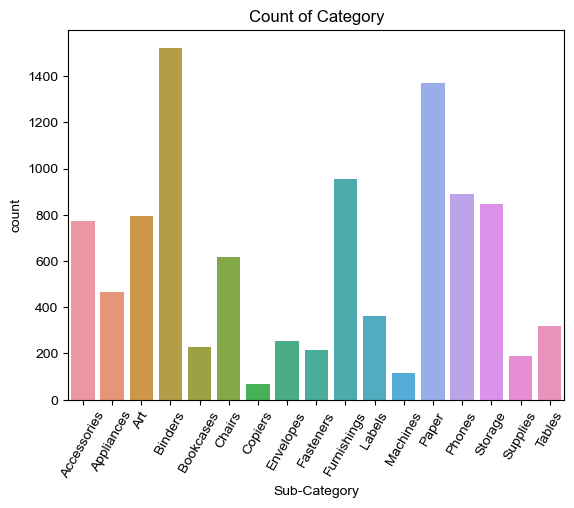

In [66]:
sns.countplot(x='Sub-Category', data = df)
sns.set_theme(style="whitegrid")
plt.title('Count of Category')
plt.xticks(rotation = 60)
plt.show()

In [79]:
fur_entr=df[df['Category']=='Furniture']

In [80]:
fur_group=fur_entr.groupby(['Category', 'Product Name'])['Quantity'].sum().reset_index().sort_values('Quantity', 
                                                                                                    ascending = False)
fur_group=fur_group[['Product Name','Quantity']].set_index('Product Name')


In [81]:
fur_group

,Quantity
Product Name,
KI Adjustable-Height Table,74
"Situations Contoured Folding Chairs, 4/Set",64
Staple-based wall hangings,62
Chromcraft Round Conference Tables,61
Eldon Wave Desk Accessories,61
...,...
"Iceberg Nesting Folding Chair, 19w x 6d x 43h",0
"Iceberg OfficeWorks 42"" Round Tables",0
KI Adjustable-Height Table,0


<Axes: ylabel='Quantity'>

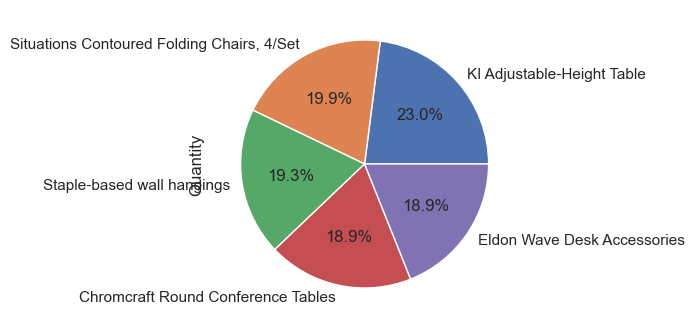

In [84]:
plt.figure(figsize=(4,8))
fur_group.head()['Quantity'].plot.pie(autopct="%1.1f%%")

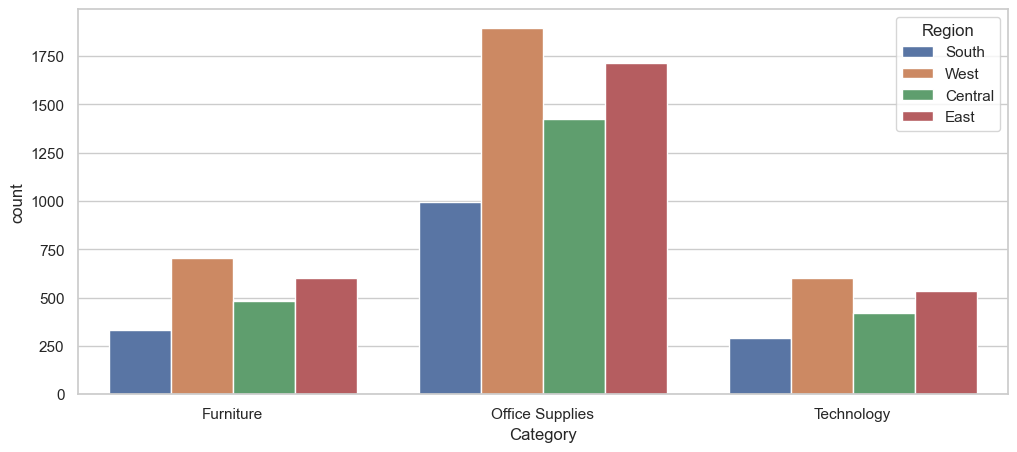

In [85]:
plt.figure(figsize=(12,5))
sns.countplot(x="Category", hue="Region", data=df)
plt.show()

In [92]:
df['Order Month']=df['Order Date'].dt.month

In [94]:
df['Order Month']

0       11
1       11
2        6
3       10
4       10
        ..
9988     1
9989     2
9990     2
9991     2
9992     5
Name: Order Month, Length: 9993, dtype: int32

In [101]:
df[['Discount', 'Quantity', 'Profit']]

,Discount,Quantity,Profit
0,0.00,2,41.9136
1,0.00,3,219.5820
2,0.00,2,6.8714
3,0.45,5,-383.0310
4,0.20,2,2.5164
...,...,...,...
9988,0.20,3,4.1028
9989,0.00,2,15.6332
9990,0.20,2,19.3932
9991,0.00,4,13.3200


In [103]:
# Which month does the company records more sales?
month_sales_df = pd.DataFrame(df.groupby(['Order Month'])[['Discount', 'Quantity', 'Profit']]
                              .mean().sort_values('Discount',ascending = False))
month_sales_df = month_sales_df.reset_index()
month_sales_df = month_sales_df.set_index('Order Month')
month_sales_df

,Discount,Quantity,Profit
Order Month,,,
5,0.165429,3.797279,30.491575
4,0.162924,3.665667,17.390547
6,0.162817,3.737796,29.687302
10,0.162601,3.789988,38.808353
11,0.158307,3.925901,24.111779
...,...,...,...
8,0.154235,3.943343,30.845522
12,0.150433,3.848722,30.801983
1,0.149921,3.871391,23.974924


In [90]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

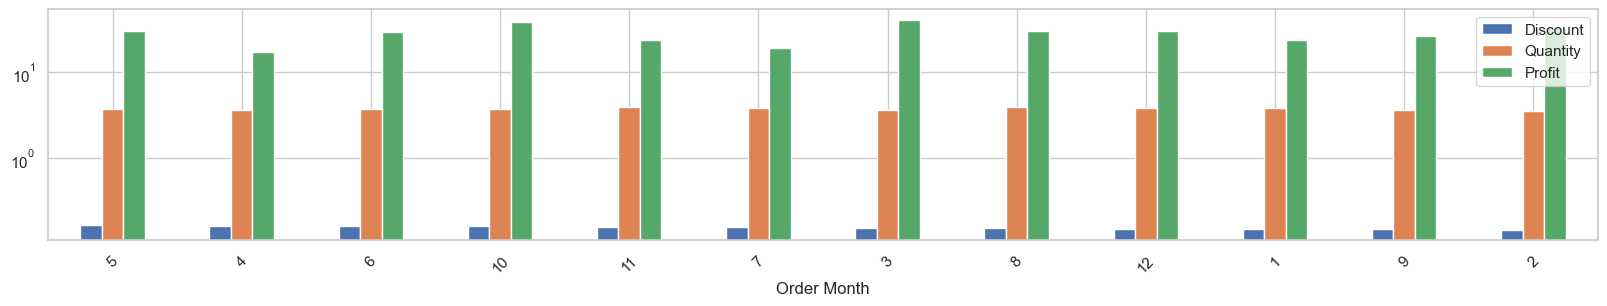

In [104]:
month_sales_df.plot(kind = 'bar', figsize = (20,3))
plt.xticks(rotation = 45)
plt.yscale('log')